In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [133]:
dcc = pd.read_csv("daily_crowd_data.csv")
dcc.head()

,날짜,요일,홈,방문,구장,관중수
0,2024/03/23,토,LG,한화,잠실,"23,750"
1,2024/03/23,토,SSG,롯데,문학,"23,000"
2,2024/03/23,토,NC,두산,창원,"17,891"
3,2024/03/23,토,KT,삼성,수원,"18,700"
4,2024/03/23,토,KIA,키움,광주,"20,500"


In [134]:
dcc['관중수'] = dcc['관중수'].apply(lambda x: str(x).replace(',', ''))
dcc['관중수'] = dcc['관중수'].astype(float)

print(dcc)

             날짜 요일    홈   방문  구장      관중수
0    2024/03/23  토   LG   한화  잠실  23750.0
1    2024/03/23  토  SSG   롯데  문학  23000.0
2    2024/03/23  토   NC   두산  창원  17891.0
3    2024/03/23  토   KT   삼성  수원  18700.0
4    2024/03/23  토  KIA   키움  광주  20500.0
..          ... ..  ...  ...  ..      ...
568  2024/08/18  일  SSG   한화  문학  22545.0
569  2024/08/18  일   LG  KIA  잠실  23750.0
570  2024/08/18  일   KT   두산  수원  12164.0
571  2024/08/18  일   NC   삼성  창원  12328.0
572  2024/08/18  일   롯데   키움  사직  20740.0

[573 rows x 6 columns]


In [135]:
hdcc = dcc[(dcc['홈'] == '한화') | (dcc['방문'] == '한화')]

print(hdcc)

             날짜 요일    홈  방문  구장      관중수
0    2024/03/23  토   LG  한화  잠실  23750.0
5    2024/03/24  일   LG  한화  잠실  23750.0
9    2024/03/26  화  SSG  한화  문학  10541.0
14   2024/03/27  수  SSG  한화  문학  11005.0
19   2024/03/28  목  SSG  한화  문학  11755.0
..          ... ..  ...  ..  ..      ...
551  2024/08/14  수   한화  LG  대전  11884.0
555  2024/08/15  목   한화  LG  대전  12000.0
558  2024/08/16  금  SSG  한화  문학  21057.0
563  2024/08/17  토  SSG  한화  문학  23000.0
568  2024/08/18  일  SSG  한화  문학  22545.0

[113 rows x 6 columns]


In [136]:
# 공휴일
holidays = ['2024-04-10', '2024-05-06', '2024-05-15', '2024-06-06', '2024-08-15']

hdcc.loc[:, '날짜'] = pd.to_datetime(hdcc['날짜'])

hdcc_work = hdcc[(hdcc['요일'].isin(['월', '화', '수', '목', '금'])) & (~hdcc['날짜'].isin(pd.to_datetime(holidays)))]

hdcc_week = hdcc[hdcc['요일'].isin(['토', '일'])]

# 공휴일 데이터 필터링
holiday_data = hdcc[hdcc['날짜'].isin(pd.to_datetime(holidays))]

# 주말 데이터에 공휴일 데이터 추가
hdcc_week = pd.concat([hdcc_week, holiday_data])

# 중복 제거 (공휴일이 이미 주말에 포함된 경우 제거)
hdcc_week = hdcc_week.drop_duplicates()

print("평일 데이터:")
print(hdcc_work.head())

print("주말 및 공휴일 데이터:")
print(hdcc_week.head())



평일 데이터:
                     날짜 요일    홈  방문  구장      관중수
9   2024-03-26 00:00:00  화  SSG  한화  문학  10541.0
14  2024-03-27 00:00:00  수  SSG  한화  문학  11005.0
19  2024-03-28 00:00:00  목  SSG  한화  문학  11755.0
23  2024-03-29 00:00:00  금   한화  KT  대전  12000.0
38  2024-04-02 00:00:00  화   한화  롯데  대전  12000.0
주말 및 공휴일 데이터:
                     날짜 요일   홈  방문  구장      관중수
0   2024-03-23 00:00:00  토  LG  한화  잠실  23750.0
5   2024-03-24 00:00:00  일  LG  한화  잠실  23750.0
28  2024-03-30 00:00:00  토  한화  KT  대전  12000.0
33  2024-03-31 00:00:00  일  한화  KT  대전  12000.0
55  2024-04-06 00:00:00  토  키움  한화  고척  16000.0


In [137]:
hdcc_week.set_index('날짜', inplace=True) #다음 업데이트 오류

c:\Users\medici\miniconda3\envs\baseball_project\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [138]:
hdcc_work.set_index('날짜', inplace=True) #다음 업데이트 오류

In [139]:
hdcc_week = hdcc_week.copy()

# 변화율 계산
hdcc_week['변화율'] = hdcc_week['관중수'].pct_change()

In [140]:
hdcc_work = hdcc_work.copy()

# 변화율 계산
hdcc_work['변화율'] = hdcc_work['관중수'].pct_change()

In [141]:
# 현재 작업 디렉토리 확인
script_dir = os.getcwd()  # 현재 작업 디렉토리
file_path = os.path.join(script_dir,'..','Youngyun','2024_일자별순위.csv')
file_path = os.path.abspath(file_path)

# CSV 파일을 읽기

data = pd.read_csv(file_path)


In [142]:
hdata = data[data['팀명'] == '한화'].copy()

In [143]:
hdata.set_index('일자', inplace=True) #다음 업데이트 오류

In [144]:
hdcc_work.head()

,요일,홈,방문,구장,관중수,변화율
날짜,,,,,,
2024-03-26,화,SSG,한화,문학,10541.0,NaN
2024-03-27,수,SSG,한화,문학,11005.0,0.044019
2024-03-28,목,SSG,한화,문학,11755.0,0.068151
2024-03-29,금,한화,KT,대전,12000.0,0.020842
2024-04-02,화,한화,롯데,대전,12000.0,0.000000


In [145]:
# 인덱스를 datetime 형식으로 변환
hdata.index = pd.to_datetime(hdata.index, format='%Y.%m.%d')

In [117]:
# hdcc_week의 인덱스와 같은 인덱스를 가진 hdata 필터링
filtered_hdata = hdata.loc[hdata.index.intersection(hdcc_week.index)]

print(filtered_hdata)

            순위  팀명   경기   승   패  무     승률   게임차  최근10경기  연속        홈       방문
2024-03-23   6  한화    1   0   1  0  0.000   1.0  0승0무1패  1패    0-0-0    0-0-1
2024-03-24   4  한화    2   1   1  0  0.500   1.0  1승0무1패  1승    0-0-0    1-0-1
2024-03-30   1  한화    7   6   1  0  0.857   0.0  6승0무1패  6승    2-0-0    4-0-1
2024-03-31   1  한화    8   7   1  0  0.875   0.0  7승0무1패  7승    3-0-0    4-0-1
2024-04-06   2  한화   12   8   4  0  0.667   0.5  7승0무3패  2패    4-0-1    4-0-3
2024-04-07   4  한화   13   8   5  0  0.615   1.0  6승0무4패  3패    4-0-1    4-0-4
2024-04-10   5  한화   15   8   7  0  0.533   2.5  4승0무6패  5패    4-0-1    4-0-6
2024-04-13   5  한화   18   9   9  0  0.500   4.5  2승0무8패  2패    4-0-3    5-0-6
2024-04-14   5  한화   19   9  10  0  0.474   5.5  2승0무8패  3패    4-0-4    5-0-6
2024-04-20   7  한화   23  11  12  0  0.478   6.0  3승0무7패  1패    5-0-5    6-0-7
2024-04-21   7  한화   24  11  13  0  0.458   6.0  3승0무7패  2패    5-0-6    6-0-7
2024-04-27   8  한화   29  12  17  0  0.414   8.0  3승0무7패  1승    6

In [118]:
hdcc_week = hdcc_week.copy()

# 변화율 계산
hdcc_week['변화율'] = hdcc_week['관중수'].pct_change()

In [71]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_week['관중수 변화율'] = hdcc_week['변화율'].rolling(window=2).mean()
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_work['관중수 변화율'] = hdcc_work['변화율'].rolling(window=2).mean()

In [119]:
# 변화율 계산
filtered_hdata['변화율'] = filtered_hdata['순위'].pct_change()

In [120]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_week['관중수 변화율'] = hdcc_week['변화율'].rolling(window=2).mean()

In [121]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
filtered_hdata['롤링 변화율'] = filtered_hdata['변화율'].rolling(window=2).mean()

In [122]:
filtered_hdata = filtered_hdata.sort_index()
hdcc_week = hdcc_week.sort_index()

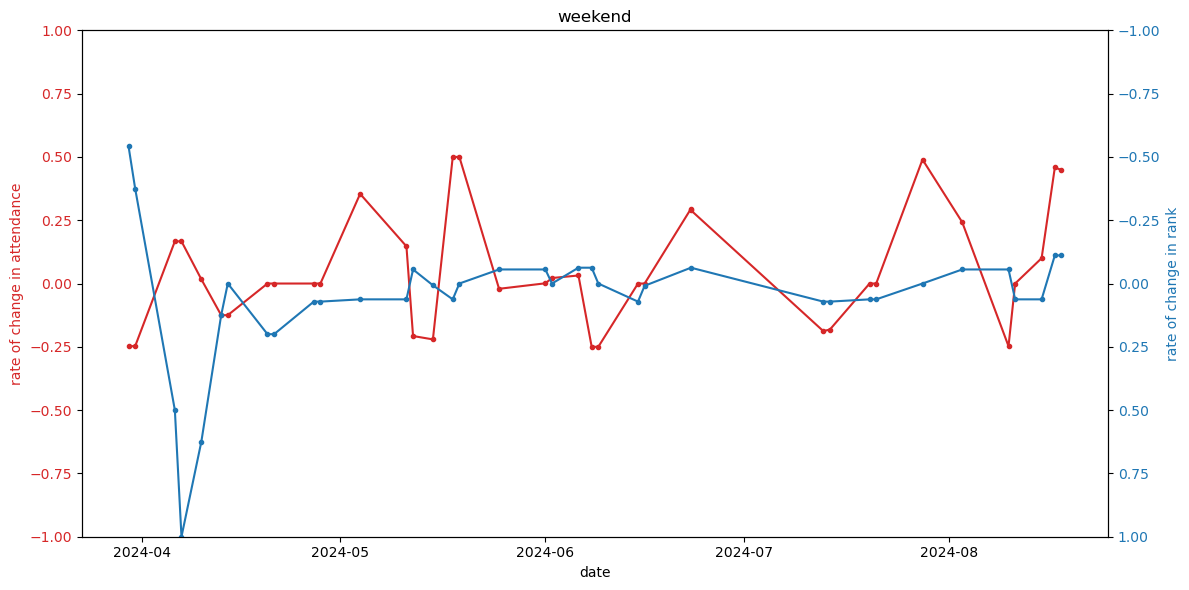

In [124]:
# 결측치가 있는지 확인하고 제거
filtered_hdata = filtered_hdata.dropna(subset=['롤링 변화율'])
hdcc_week = hdcc_week.dropna(subset=['관중수 변화율'])

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 관중수 변화율 데이터
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('rate of change in attendance', color=color)
ax1.plot(hdcc_week.index, hdcc_week['관중수 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_week')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.0, 1.0)

# 두 번째 Y축: 순위 변화율 데이터
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('rate of change in rank', color=color)
ax2.plot(filtered_hdata.index, filtered_hdata['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1.0, 1.0)
ax2.invert_yaxis()  # 순위 데이터의 Y축을 뒤집음


# 제목과 레이블 설정
plt.title('weekend')
fig.tight_layout()  # 레이아웃 조정

plt.show()

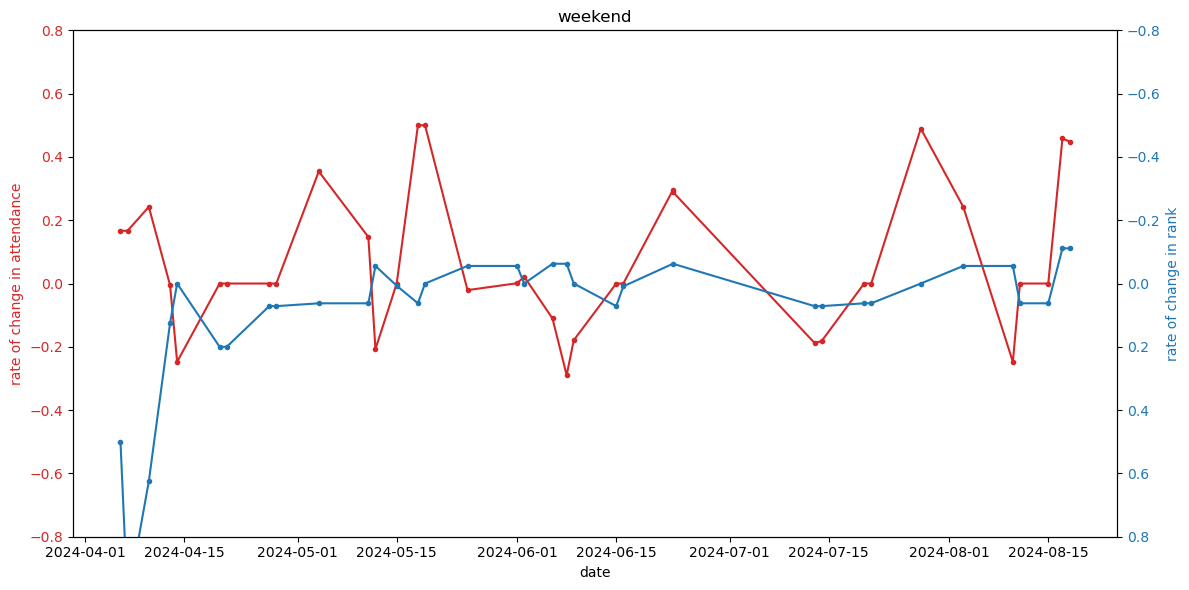

In [42]:

# 결측치가 있는지 확인하고 제거
filtered_hdata = filtered_hdata.dropna(subset=['롤링 변화율'])
hdcc_work = hdcc_week.dropna(subset=['관중수 변화율'])

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 관중수 변화율 데이터
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('rate of change in attendance', color=color)
ax1.plot(hdcc_week.index, hdcc_week['관중수 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_week')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0.8, 0.8)

# 두 번째 Y축: 순위 변화율 데이터
ax2 = ax1.twinx()  # 공유된 x축을 가진 새로운 Y축 생성
color = 'tab:blue'
ax2.set_ylabel('rate of change in rank', color=color)
ax2.plot(filtered_hdata.index, filtered_hdata['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.8, 0.8)
ax2.invert_yaxis()  # 순위 데이터의 Y축을 뒤집음


# 제목과 레이블 설정
plt.title('weekend')
fig.tight_layout()  # 레이아웃 조정

# 그래프 출력
plt.show()

In [125]:
hdcc_week = hdcc_week.sort_index()

In [146]:
# hdcc_week의 인덱스와 같은 인덱스를 가진 hdata 필터링
filtered_hdata_work = hdata.loc[hdata.index.intersection(hdcc_work.index)]

# 결과 출력 (필요한 경우)
print(filtered_hdata_work)

            순위  팀명   경기   승   패  무     승률   게임차  최근10경기  연속        홈       방문
2024-03-26   2  한화    3   2   1  0  0.667   0.5  2승0무1패  2승    0-0-0    2-0-1
2024-03-27   2  한화    4   3   1  0  0.750   0.5  3승0무1패  3승    0-0-0    3-0-1
2024-03-28   2  한화    5   4   1  0  0.800   0.0  4승0무1패  4승    0-0-0    4-0-1
2024-03-29   2  한화    6   5   1  0  0.833   0.0  5승0무1패  5승    1-0-0    4-0-1
2024-04-02   1  한화    9   7   2  0  0.778   0.0  7승0무2패  1패    3-0-1    4-0-1
...         ..  ..  ...  ..  .. ..    ...   ...     ...  ..      ...      ...
2024-08-08   8  한화  104  47  55  2  0.461  13.0  8승0무2패  1승  24-2-28  23-0-27
2024-08-09   8  한화  105  48  55  2  0.466  13.0  8승0무2패  2승  25-2-28  23-0-27
2024-08-13   9  한화  108  48  58  2  0.453  14.5  5승0무5패  3패  25-2-31  23-0-27
2024-08-14   9  한화  109  49  58  2  0.458  13.5  5승0무5패  1승  26-2-31  23-0-27
2024-08-16   8  한화  111  50  59  2  0.459  14.5  5승0무5패  1승  26-2-32  24-0-27

[73 rows x 12 columns]


In [147]:
# 변화율 계산
filtered_hdata_work['변화율'] = filtered_hdata_work['순위'].pct_change()

In [148]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
filtered_hdata_work['롤링 변화율'] = filtered_hdata_work['변화율'].rolling(window=4).mean()

In [ ]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_work['관중수 변화율'] = hdcc_work['변화율'].rolling(window=2).mean()

In [82]:
filtered_hdata_work = filtered_hdata_work.sort_index()
hdcc_work = hdcc_work.sort_index()

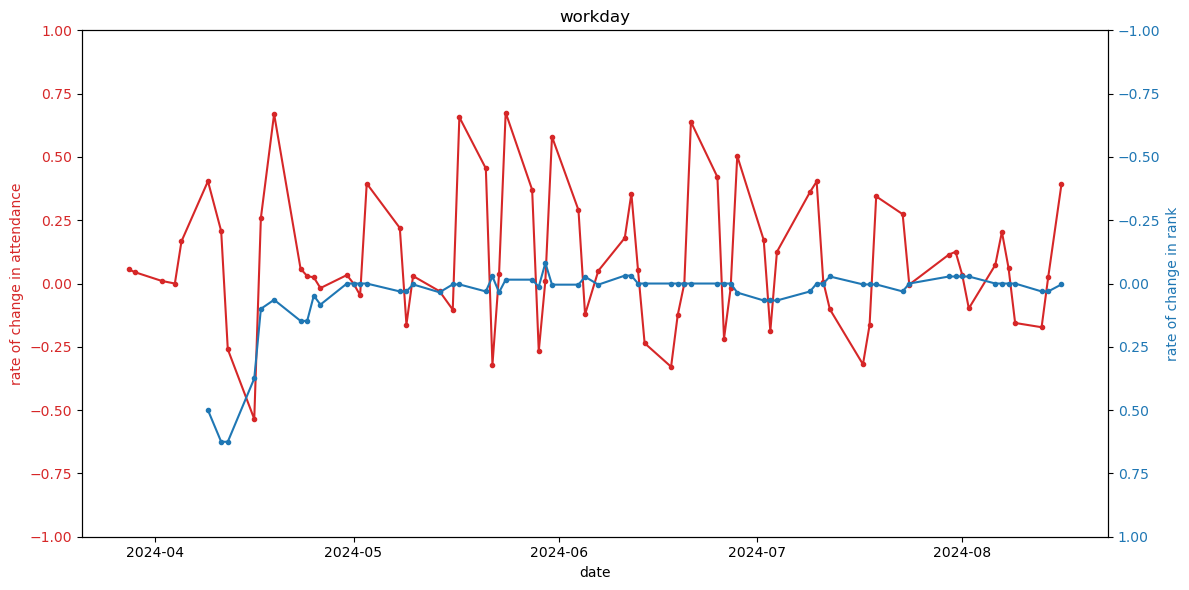

In [103]:
# 결측치가 있는지 확인하고 제거
filtered_hdata_work = filtered_hdata_work.dropna(subset=['롤링 변화율'])
hdcc_work = hdcc_work.dropna(subset=['관중수 변화율'])

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 관중수 변화율 데이터
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('rate of change in attendance', color=color)
ax1.plot(hdcc_work.index, hdcc_work['관중수 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_work')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.0, 1.0)

# 두 번째 Y축: 순위 변화율 데이터
ax2 = ax1.twinx()  # 공유된 x축을 가진 새로운 Y축 생성
color = 'tab:blue'
ax2.set_ylabel('rate of change in rank', color=color)
ax2.plot(filtered_hdata_work.index, filtered_hdata_work['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1.0, 1.0)
ax2.invert_yaxis()  # 순위 데이터의 Y축을 뒤집음


# 제목과 레이블 설정
plt.title('workday')
fig.tight_layout()  # 레이아웃 조정

# 그래프 출력
plt.show()

In [129]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
filtered_hdata_work['롤링 변화율'] = filtered_hdata_work['변화율'].rolling(window=4).mean()

In [149]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_work['관중수 변화율'] = hdcc_work['변화율'].rolling(window=4).mean()

In [151]:
filtered_hdata_work.head()

,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문,변화율,롤링 변화율
2024-03-26,2,한화,3,2,1,0,0.667,0.5,2승0무1패,2승,0-0-0,2-0-1,NaN,NaN
2024-03-27,2,한화,4,3,1,0,0.750,0.5,3승0무1패,3승,0-0-0,3-0-1,0.0,NaN
2024-03-28,2,한화,5,4,1,0,0.800,0.0,4승0무1패,4승,0-0-0,4-0-1,0.0,NaN
2024-03-29,2,한화,6,5,1,0,0.833,0.0,5승0무1패,5승,1-0-0,4-0-1,0.0,NaN
2024-04-02,1,한화,9,7,2,0,0.778,0.0,7승0무2패,1패,3-0-1,4-0-1,-0.5,-0.125


In [152]:
filtered_hdata_work = filtered_hdata_work.sort_index()
hdcc_work = hdcc_work.sort_index()

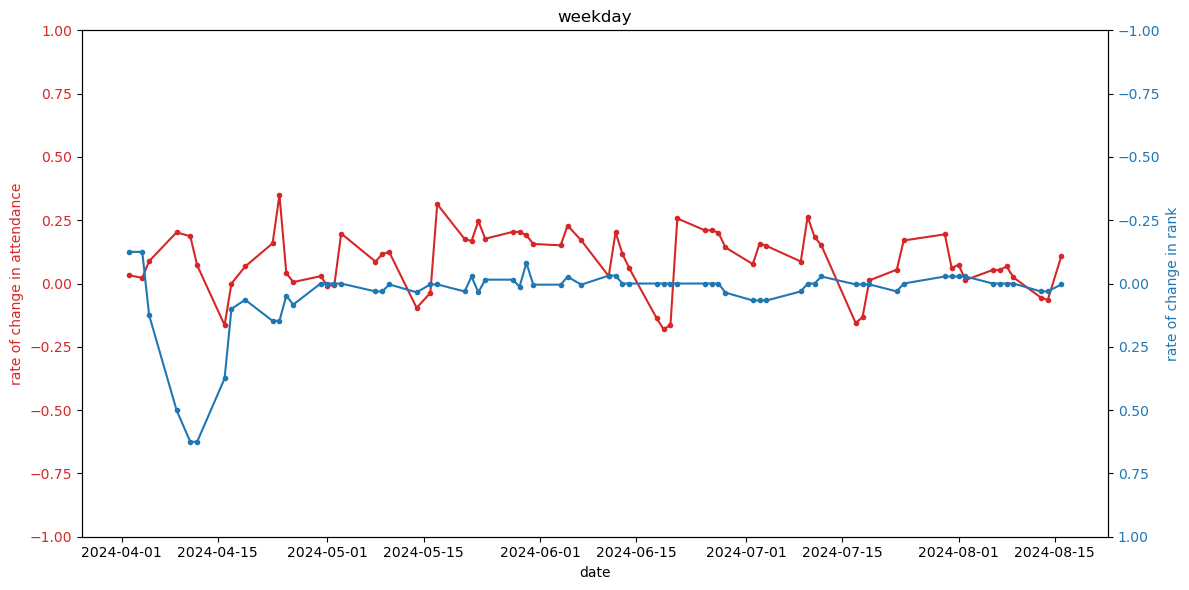

In [153]:
# 결측치가 있는지 확인하고 제거
filtered_hdata_work = filtered_hdata_work.dropna(subset=['롤링 변화율'])
hdcc_work = hdcc_work.dropna(subset=['관중수 변화율'])

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 관중수 변화율 데이터
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('rate of change in attendance', color=color)
ax1.plot(hdcc_work.index, hdcc_work['관중수 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_work')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.0, 1.0)

# 두 번째 Y축: 순위 변화율 데이터
ax2 = ax1.twinx()  # 공유된 x축을 가진 새로운 Y축 생성
color = 'tab:blue'
ax2.set_ylabel('rate of change in rank', color=color)
ax2.plot(filtered_hdata_work.index, filtered_hdata_work['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1.0, 1.0)
ax2.invert_yaxis()  # 순위 데이터의 Y축을 뒤집음

plt.title('weekday')
fig.tight_layout()

plt.show()